In [1]:
import cv2
import numpy as np

In [3]:
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [5]:
IMG_SIZE = 480
THRESHOLD = 0.95

In [6]:
# TorchVision Models
model = models.detection.keypointrcnn_resnet50_fpn(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-9f466800.pth" to C:\Users\MiRcomputer/.cache\torch\checkpoints\keypointrcnn_resnet50_fpn_coco-9f466800.pth
100%|██████████| 237034793/237034793 [00:25<00:00, 9296723.93it/s] 


In [7]:
img = Image.open('data/photo1.jpg')

In [8]:
# 이미지의 크기를 작게 변형한다
img = img.resize((IMG_SIZE, int(img.height * IMG_SIZE / img.width)))

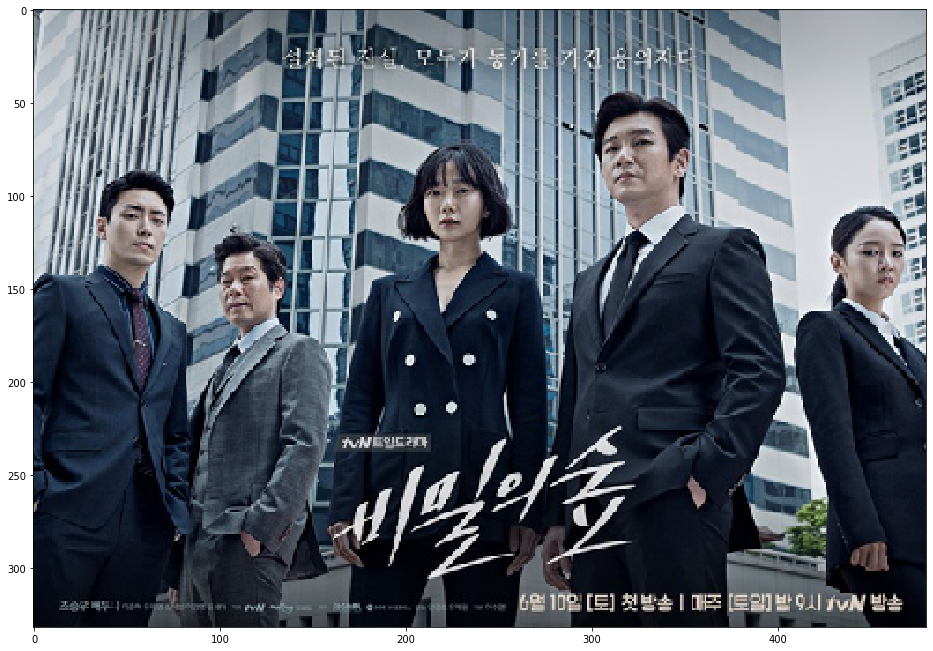

In [9]:
plt.figure(figsize=(16,16))
plt.imshow(img)

In [10]:
# Tensor로 바꾸어 주어야 (ToTensor) 이미지 인식 가능 
trf = T.Compose([     # 여러개의 트랜스폼 방법을 묶어 차례로 수행한다.
    T.ToTensor()      # 이미지를 0-1 사이의 값을 가지는 텐서로 바꾼다.
])

input_img = trf(img)

In [11]:
input_img.shape     # 채널, 세로, 가로

torch.Size([3, 332, 480])

## Inference
- boxes (Tensor([N,4])
- labels
- keypoints (Tensor[N, K, 3])    
<br>
                                 - N: 사람일 가능성이 있는 bounding box의 개수 <br>
                                 - K: 키 포인트의 개수 <br>
                                 - 3: [x, y, visibility] <br>
                                     - visibility = 0 : 키포인트가 몸이나 사물에 가려서 안보이는 경우


In [23]:
# model에 input_img 넣어주면 output이 나온다.
output = model([input_img])[0]
print( output.keys() )

dict_keys(['boxes', 'labels', 'scores', 'keypoints', 'keypoints_scores'])


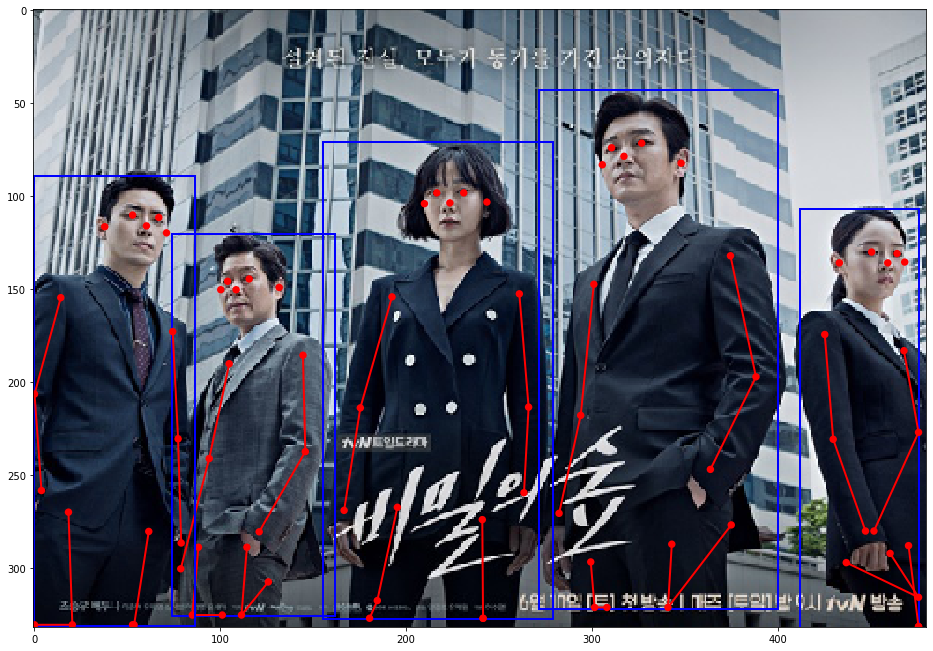

In [25]:
# box : 사람의 bounding box 영역
# score : bounding box를 사람이라고 판단한 점수. 높을수록 사람일 확률이 높음 
# keypoints : 사람의 keyPoints 점들의 좌표

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO
]
fig, ax = plt.subplots(1, figsize=(16,16))
ax.imshow(img)


for box, score, keypoints in zip(output['boxes'], output['scores'], output['keypoints']):
    score = score.detach().numpy()     # score가 현재 텐서로 되어있으니까 모델에서 분리해서 numpy 배열로 변환.
    
    if score < THRESHOLD:    # 0.95 보다 낮은 점수를 가지고 있는 박스를 제외한다.
        continue
        
    box = box.detach().numpy()
    keypoints = keypoints.detach().numpy()[:, :2]      # 3번째 인자인 visibility는 빼고, 앞의 두개(x, y) 값만 추려온다.
    
    # 파란색 사각형 만들기
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='b', facecolor='none')
    # (box[0], box[1]) = x0, y0
    # box[2] - box[0] = width
    # box[3] - box[1] = height
    
    # 만든 사각형을 그림위에다 그린다.
    ax.add_patch(rect)
    
    # 키포인트 그리기 
    for k in keypoints:
        circle = patches.Circle((k[0], k[1]), radius=2, facecolor='r')   # 빨간색 원
        ax.add_patch(circle)
    
    # 상자안에서 경로 그리기 (matplotlib의 Path 사용)
    # 왼쪽 팔
    path = Path(keypoints[5:10:2], codes)   # 2칸씩 뛰며 그린다.
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')   # 빨간색으로 path 를 그려라.
    ax.add_patch(line)
    # 오른쪽 팔
    path = Path(keypoints[6:11:2], codes)   # 2칸씩 뛰며 그린다.
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')   # 빨간색으로 path 를 그려라.
    ax.add_patch(line)
    # 왼쪽 다리
    path = Path(keypoints[11:16:2], codes)   # 2칸씩 뛰며 그린다.
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')   # 빨간색으로 path 를 그려라.
    ax.add_patch(line)
    # 오른쪽 다리
    path = Path(keypoints[12:17:2], codes)   # 2칸씩 뛰며 그린다.
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')   # 빨간색으로 path 를 그려라.
    ax.add_patch(line)